In [4]:
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [5]:
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

1


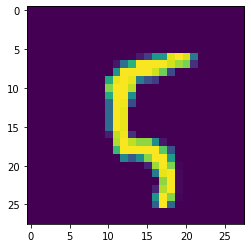

In [10]:
# take a peek at the data
plt.imshow(pairs_train[200,0])
print(labels_train[200])

In [11]:
# Weights not shared

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)


In [13]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_input (InputLayer)      [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1_input (InputLayer)    [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           flatten_input[0][0]              
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           flatten_1_input[0][0]            
______________________________________________________________________________________________

In [15]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpynyuam2a.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpynyuam2a.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4664/7500 [=================>............] - ETA: 3s - loss: 0.7001 - accuracy: 0.5021

KeyboardInterrupt: 

In [16]:
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Concatenate()([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [17]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, 128)          100480      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 256)          0           model_1[0][0]              

In [18]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.6967 - accuracy: 0.5031
Epoch 2/10
3313/7500 [============>.................] - ETA: 4s - loss: 0.6934 - accuracy: 0.5011

KeyboardInterrupt: 

In [31]:
from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

# absolute difference between vectors give better training accuracy
def absolute_diff(vects):
    x, y = vects
    return abs(x-y)

input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [32]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_13 (Functional)           (None, 128)          100480      input_20[0][0]                   
                                                                 input_21[0][0]                   
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 1)            0           model_13[0][0]            

In [33]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.5382 - accuracy: 0.7215
Epoch 2/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3627 - accuracy: 0.8465
Epoch 3/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3394 - accuracy: 0.8582
Epoch 4/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3360 - accuracy: 0.8605
Epoch 5/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3339 - accuracy: 0.8604
Epoch 6/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3340 - accuracy: 0.8622
Epoch 7/10
7500/7500 [==============================] - 7s 958us/step - loss: 0.3269 - accuracy: 0.8640
Epoch 8/10
7500/7500 [==============================] - 7s 986us/step - loss: 0.3305 - accuracy: 0.8630
Epoch 9/10
7500/7500 [==============================] - 7s 959us/step - loss: 0.3302 - accuracy: 0.8623
Epoch 10/10
7500/7500 [==============================] - 7s 957us/step - los

array([[5.0249963],
       [5.2089543],
       [3.201473 ],
       [5.975113 ],
       [4.750642 ],
       [5.159156 ],
       [3.20649  ],
       [4.343628 ],
       [4.144156 ],
       [4.6518426],
       [5.0975466],
       [5.408521 ],
       [1.4890893],
       [4.7235627],
       [6.125441 ],
       [4.906605 ],
       [5.3288717],
       [5.8312774],
       [3.9407134],
       [3.7102926],
       [3.0666695],
       [4.858267 ],
       [3.1148467],
       [5.1245933],
       [5.438567 ],
       [6.089241 ],
       [4.323873 ],
       [5.2438707],
       [3.6994154],
       [8.483834 ],
       [2.2479403],
       [5.1236877],
       [5.4368477],
       [4.468987 ],
       [5.3873725],
       [6.7580404],
       [3.3060052],
       [5.1335177],
       [4.319157 ],
       [5.0302362],
       [4.6010137],
       [5.50213  ],
       [4.0740275],
       [5.5968795],
       [3.6118877],
       [6.381815 ],
       [2.0798607],
       [5.61024  ],
       [4.9588966],
       [5.2881026],
